# Titanic Data Analysis 

In [1]:
#Import Modules 

# Data processing
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Machine learning packages
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#Read csv file
path = r"C:\Users\Owen\Documents\Titanic\train.csv"
df_train = pd.read_csv(path)
path = r"C:\Users\Owen\Documents\Titanic\test.csv"
df_test = pd.read_csv(path)

In [2]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Data Visualization

**Number of people who survived distributed by age:**

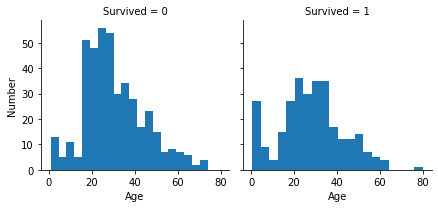

In [7]:
# FacetGrid allows us to output two histograms side by side 
age_hist = sns.FacetGrid(df_train, col='Survived')
age_hist.map(plt.hist, 'Age', bins=20)
age_hist.set_ylabels('Number')

**Age and sex:**

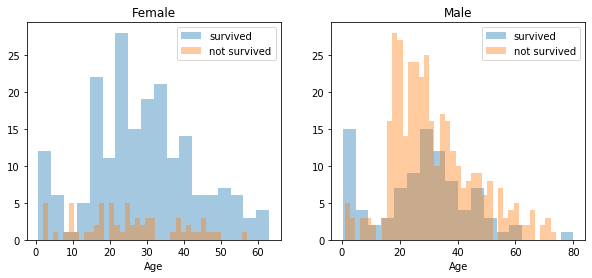

In [8]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,4))

female = df_train[df_train['Sex']=='female']
male = df_train[df_train['Sex']=='male']

survived = 'survived'
not_survived = 'not survived'

ax1 = sns.distplot(female[female['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax1 = sns.distplot(female[female['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax1.legend()
ax1.set_title('Female')

ax2 = sns.distplot(male[male['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax2 = sns.distplot(male[male['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax2.legend()
_ = ax2.set_title('Male')


**Passenger Class:**

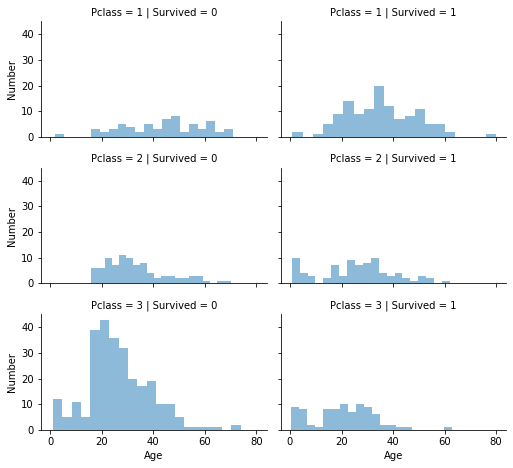

In [9]:
pclass_age_grid = sns.FacetGrid(df_train, col='Survived', row='Pclass', height=2.2, aspect = 1.6)
pclass_age_grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
pclass_age_grid.set_ylabels('Number')

**Survival rate of passengers based on embarking zone for each sex:**

c:\users\owen\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\users\owen\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


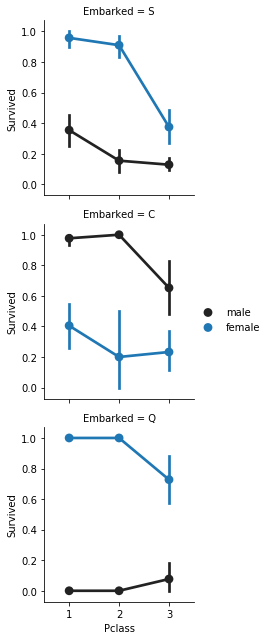

In [10]:
embarked_grid = sns.FacetGrid(df_train, row="Embarked")
embarked_grid.map(sns.pointplot, "Pclass","Survived","Sex")
embarked_grid.add_legend()

# Data Wrangling 

There are a number of things I need to do to the data before the machine learning algorithms can be applied:

1. Drop the cabin and ticket class columns 
2. Convert sex to a binary feature
3. Convert embarked to a numeric feature
4. Replace the name column with a title column 
5. Combine the SibSp and Parch columns to make a family size column 
6. Populate null age values with predicted data 
7. Convert age to discrete bands with numeric labels 


**Dropping irrelevent columns:**

The ticket and cabin columns can be deleted as they do not tell us much about the survival and have lots of missing information. We are also going to drop the fare column as we are assuming that pclass is indicatory of the fare anyway

In [11]:
# We can combine the dataframe so we can do one operation on both dataframes at the same time

combine = [df_train, df_test]
for dataset in combine:
    dataset = dataset.drop(['Ticket','Cabin','Fare'],axis=1,inplace=True)

**Converting 'Sex' column from string to binary**

In [12]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female': 1, 'male': 0}).astype(int)  

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,S


**Converting embarked to a numeric feature** 

We need to fill the null values in the embarked column with data before we can convert to numeric. Let us set them as the most common port in the train dataset, as we assume this dataset is representative of test as well  

In [13]:
#the [0] simply means we display we store this as a one element array
mode_port = df_train['Embarked'].dropna().mode()[0]
mode_port

'S'

In [14]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(mode_port)

df_train[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


Now let us put the numerical mapping onto the ports

In [15]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0,'C': 1,'Q': 2}).astype(int)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,0


**Replace the name column with a title column**

In [16]:
# The argument of str.extract is a regex pattern 
# the \ means we do not activate . special characteristics. Putting \. outside bracket means we still search for it but do not 
# output it. 
# [a-z] match any high case letter followed by match any low case letter 
# + means continue to match any low case letter 

for dataset in combine: 
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.')

pd.crosstab(df_train['Title'], df_train['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [17]:
pd.crosstab(df_test['Title'], df_test['Sex'])

Sex,0,1
Title,,
Col,2,0
Dona,0,1
Dr,1,0
Master,21,0
Miss,0,78
Mr,240,0
Mrs,0,72
Ms,0,1
Rev,2,0


There are a lot of titles so they should be grouped together into categories:

- Mlle, Miss and Ms should be grouped together as Miss
- Mrs and Mme should be distinct from Miss
- Master is an honorific for boys and young men so should be distinct from Mr which refers to adult men 
- Royalty should be lumped together: Countess, Lady, Dona, Don, Sir, Jonkheer
- Lastly a group for those with special roles in society (likely to effect their survival). This includes Rev, Col, Capt, Dr and Major

In [18]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(('Mlle', 'Ms'),'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')
    dataset['Title'] = dataset['Title'].replace(('Countess','Lady','Dona','Don','Jonkheer','Sir'),'Royalty')
    dataset['Title'] = dataset['Title'].replace(('Rev','Dr','Capt','Col','Major'),'Special')

In [19]:
pd.crosstab(df_train['Title'], df_train['Sex'])

Sex,0,1
Title,,
Master,40,0
Miss,0,185
Mr,517,0
Mrs,0,126
Royalty,3,2
Special,17,1


In [20]:
df_train[['Title','Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Royalty,0.600000
5,Special,0.277778


Before the machine learning algorithms can use this title column we first need to map these titles as numbers

In [21]:
title_mapping = {'Master':1,'Miss':2,'Mr':3,'Mrs':4,'Royalty':5,'Special':6}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping).astype(int)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,0,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,1,4
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,0,4
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,0,3


Now we have a title column we do not need to identify passengers by their name or passengerid anymore so we can drop that column. 

In [22]:
df_train.drop(['PassengerId', 'Name'], axis=1, inplace=True)
df_test.drop(['Name'], axis=1,inplace=True)
combine = [df_train, df_test]

df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,0,3,0,22.0,1,0,0,3
1,1,1,1,38.0,1,0,1,4
2,1,3,1,26.0,0,0,0,2
3,1,1,1,35.0,1,0,0,4
4,0,3,0,35.0,0,0,0,3


**Combining SibSp and Parch features to make a FamilySize feature**

In [23]:
for dataset in combine:
    dataset['FamilySize'] = dataset[['SibSp','Parch']].sum(axis=1)+1
df_train[['FamilySize','Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [24]:
df_train.drop(['SibSp','Parch'],axis=1,inplace=True)
df_test.drop(['SibSp','Parch'],axis=1,inplace=True)
df_train.head()

,Survived,Pclass,Sex,Age,Embarked,Title,FamilySize
0,0,3,0,22.0,0,3,2
1,1,1,1,38.0,1,4,2
2,1,3,1,26.0,0,2,1
3,1,1,1,35.0,0,4,2
4,0,3,0,35.0,0,3,1


**Populate null age values with predicted data**

In [25]:
df_train['Age'].isnull().sum()

177

We have 177 null values in the age data. I would like to use the median age for passengers based on their sex and passenger class. I should store the median ages in an array. The array is 2rowsx3columns, the rows being sex 0 and 1 and the columns being Pclass 1, 2 ,3

In [26]:
#create 2x3 array
median_age = np.zeros((2,3))

for dataset in combine:
    for Sex in range(0,2):
        for Pclass in range(0,3):
            guess_df = dataset[(dataset['Sex']==Sex) & (dataset['Pclass']==Pclass+1)].Age.dropna()
            age_guess = guess_df.median()
            median_age[Sex,Pclass] = age_guess

median_age

array([[42., 28., 24.],
       [41., 24., 22.]])

Now we need to loop through the dataframe, locating any null values and replacing these null values with the correct value from median age

In [27]:
for dataset in combine:
    for Sex in range(0,2):
        for Pclass in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex==Sex) & (dataset.Pclass==Pclass+1),\
                        'Age'] = median_age[Sex,Pclass]
        
    dataset['Age'] = dataset['Age'].astype(int)
df_train['Age'].isnull().sum()+df_test['Age'].isnull().sum()

0

**Converting age column into discrete bands with a numerical label**

In [28]:
df_train['AgeBand'] = pd.cut(df_train['Age'],5)
df_train[['AgeBand','Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
3,"(48.0, 64.0]",0.434783
2,"(32.0, 48.0]",0.412037
1,"(16.0, 32.0]",0.337374
4,"(64.0, 80.0]",0.090909


In [29]:
for dataset in combine:
    dataset.loc[(dataset['Age']<=16),'AgeG'] = 0
    dataset.loc[(dataset['Age']>16) & (dataset['Age']<=32), 'AgeG'] = 1
    dataset.loc[(dataset['Age']>32) & (dataset['Age']<=48), 'AgeG'] = 2
    dataset.loc[(dataset['Age']>48) & (dataset['Age']<=64), 'AgeG'] = 3
    dataset.loc[(dataset['Age']>64), 'AgeG'] = 4
    
df_train.head()

,Survived,Pclass,Sex,Age,Embarked,Title,FamilySize,AgeBand,AgeG
0,0,3,0,22,0,3,2,"(16.0, 32.0]",1.0
1,1,1,1,38,1,4,2,"(32.0, 48.0]",2.0
2,1,3,1,26,0,2,1,"(16.0, 32.0]",1.0
3,1,1,1,35,0,4,2,"(32.0, 48.0]",2.0
4,0,3,0,35,0,3,1,"(32.0, 48.0]",2.0


Now we are done putting the age feature into groups we can lose the AgeBand and Age columns 

In [30]:
df_train.drop(['AgeBand','Age'],axis=1,inplace=True)
combine = ['df_train','df_test']

df_train.head()

,Survived,Pclass,Sex,Embarked,Title,FamilySize,AgeG
0,0,3,0,0,3,2,1.0
1,1,1,1,1,4,2,2.0
2,1,3,1,0,2,1,1.0
3,1,1,1,0,4,2,2.0
4,0,3,0,0,3,1,2.0


convert the AgeG column to integers 

In [31]:
df_train.AgeG = df_train.AgeG.astype(int)
df_train.head()

,Survived,Pclass,Sex,Embarked,Title,FamilySize,AgeG
0,0,3,0,0,3,2,1
1,1,1,1,1,4,2,2
2,1,3,1,0,2,1,1
3,1,1,1,0,4,2,2
4,0,3,0,0,3,1,2


In [32]:
df_test.AgeG = df_test.AgeG.astype(int)
df_test.drop(['Age'],axis=1,inplace=True)
df_test.head()

,PassengerId,Pclass,Sex,Embarked,Title,FamilySize,AgeG
0,892,3,0,2,3,1,2
1,893,3,1,0,4,2,2
2,894,2,0,2,3,1,3
3,895,3,0,0,3,1,1
4,896,3,1,0,4,3,1


# Model, predict and solve the problem 

Now we can get around to solving the problem at hand: predictng whether a passenger survived or died in the titanic disaster. First we need to shape the data into X and y arrays.

In [33]:
X_train = df_train.drop(['Survived'],axis=1)

In [34]:
Y_train = df_train['Survived']

In [35]:
X_test = df_test.drop(['PassengerId'],axis=1)

Now that the data is ready we can choose the machine learning algorithms to use. There are many available, but not all of them will be useful for solving this problem.The problem is a classification one - as we want to classify the people into two groups: survived = 0 and survived = 1. We might also be interested in regression algorithms  - as we can use these to see which of our features is most important to survivability Lastly, we are doing a type of supervised machine learning, which means that we give a machine learning algorithm some labled training data to learn from. Given our criteria, supervised learning plus classification and regression, we can choose the following models: 

- logistic regression 
- KNN or k nearest neighbours 

**Logistic Regression**

In [36]:
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)
Y_pred = log_reg.predict(X_test)
# round(,2) -> round to two decimal points
# 
acc_log = round(log_reg.score(X_train,Y_train)*100, 2)
acc_log

80.02

We can use logistic regression to find the correlation between the different columns within the data for increasing survival

In [37]:
coeff_df = pd.DataFrame(df_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df
# putting the [0] in makes the log_reg.coef_ 1D (check with series.ndim)
coeff_df['Correlation'] = pd.Series(log_reg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.627679
2,Embarked,0.219014
3,Title,-0.163892
4,FamilySize,-0.189581
5,AgeG,-0.561444
0,Pclass,-1.227419


As sex increases from 0 (male) to 1 (female) there is a large positive correlation with survival. As Pclass increases from 1 (1st class) to 3 (3rd class) there is a large negative correlation with survival. These relationships are expected from the visualisation. With the other variable like title, they are not encoded in any particular order so ther is not much correlation

**K-Nearest Neighbours**

K-Nearest Neighbours classifies a sample based on the k nearest neighbour samples. The sample is classified as the most common category within the neighbours.  

In [38]:
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train,Y_train)*100, 2)
acc_knn

83.61

**Suport Vector Machines**

SVM is used to classify data into two different categories. An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. 

In [39]:
svc = SVC()
svc.fit(X_train,Y_train)
Y_pred = svc.predict(X_test)

acc_smm = round(svc.score(X_train,Y_train)*100, 2)
acc_smm

83.5

**Decision Trees**

like a probability tree diagram from stats

In [40]:
tree = DecisionTreeClassifier()
tree.fit(X_train,Y_train)
Y_pred = tree.predict(X_test)

acc_tree = round(tree.score(X_train,Y_train)*100, 2)
acc_tree

86.2

**Random Forest**

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes

In [41]:
forest = RandomForestClassifier()
forest.fit(X_train,Y_train)
Y_pred = forest.predict(X_test)
acc_forest = round(forest.score(X_train,Y_train)*100, 2)
acc_forest

86.2

# Which is the best model?

In [42]:
model = {'Method': ['Logistic Regression','K-Nearest Neighbors','Support Vector Machines','Decision Trees', 'Random Forest'],\
         'Score': [acc_log, acc_knn, acc_smm, acc_tree, acc_forest]}
model_df = pd.DataFrame(model)
model_df.sort_values(by='Score',ascending=False)

,Method,Score
3,Decision Trees,86.20
4,Random Forest,86.20
1,K-Nearest Neighbors,83.61
2,Support Vector Machines,83.50
0,Logistic Regression,80.02


As you can see random forest and decision trees gave the best output for these results. 

- try and get the accuracy to 90% 
- see the difference between accuracy_score() and score()
